In [263]:
# We will start by importing the neccassry libraries
import pandas as pd
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load the dataset
df = pd.read_csv("/content/Locations_final.csv")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# **EDA**

In [264]:
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of rows: 7409
Number of columns: 34


In [265]:
df.head(10)

,url,reviews/0/text,reviews/0/textTranslated,reviews/1/text,reviews/1/textTranslated,reviews/2/text,reviews/2/textTranslated,reviews/3/text,reviews/3/textTranslated,reviews/4/text,...,city,neighborhood,phone,reviewsDistribution/fiveStar,reviewsDistribution/fourStar,reviewsDistribution/oneStar,reviewsDistribution/threeStar,reviewsDistribution/twoStar,title,totalScore
0,https://www.google.com/maps/place/%D9%86%D8%B3...,ولا بريال بسم الله بشوف الغرفة قفل الغرفة خربا...,"No money, in the name of God, I see the room. ...",NaN,NaN,اول تجربه والصراحه حبيت لذاذة الطعم,"First time trying it, and honestly, I liked th...",NaN,NaN,NaN,...,Abha,7000 طريق المدينة المنورة,+966 17 517 8220,2,0,1,0,0,نسمات الغروب للوحدات السكنية المفروشه,3.7
1,https://www.google.com/maps/place/%D9%81%D9%86...,NaN,NaN,NaN,NaN,مميزاتها\n١/ الموقع ممتاز جدا برجولنا رحنا حدي...,Its advantages\n1/ The location is very excell...,الفندق جميل وموقعة مميز قريب من حديقة خيال\nوا...,The hotel is beautiful and has a great locatio...,مع التحية الفندق جميل ونظيف قريب من جميع الخدم...,...,Abha,حى,+966 17 228 0088,86,19,23,15,9,فندق دار التلال,3.9
2,https://www.google.com/maps/place/%D8%B4%D8%B9...,كنت قاطعتها فترره كبيره مع شعاع السوده لسوء ال...,I boycotted it for a long period of time due t...,NaN,NaN,ممتاز جداً نظافة وحسن التعامل مع المستأجر,Very excellent cleanliness and good treatment ...,الشقق نظيفه والاثاث نظيف واسعارهم في متناول ال...,"The apartments are clean, the furniture is cle...",NaN,...,Abha,6FPX+5J5 حي,+966 54 708 0113,95,31,28,30,13,شعاع السودة للوحدات السكنية,3.8
3,https://www.google.com/maps/place/%D8%A7%D9%84...,NaN,NaN,کل یوم تاءخر الطلب ما اشتغل ھذا العملاء,"Every day the order was delayed, this customer...",NaN,NaN,NaN,NaN,NaN,...,Abha,NaN,+966 17 231 7000,46,19,20,31,15,الخيالات سويتس,3.4
4,https://www.google.com/maps/place/%D8%AA%D9%88...,NaN,NaN,NaN,NaN,الشقة غير نظيفة ومتهالكة جدا والنت بفلوس وفيها...,The apartment is not clean and very worn out. ...,موقع استراتيجي على شارع في كل الكافيهات ومطاعم...,Strategic location on a street with all cafes ...,NaN,...,Abha,11 King Abdul Aziz Rd,+966 17 228 1400,105,59,50,59,24,توبال أبها للوحدات السكنيه,3.5
5,https://www.google.com/maps/place/%D9%82%D8%B5...,اوصي بها,I recommend it,very nice place,NaN,NaN,NaN,NaN,NaN,موقع مميز\nالسعر مقابل الخدمة ممتاز,...,Abha,"6G49+VM9, King Abdul Aziz Rd",+966 17 228 0333,102,64,40,78,29,قصر سعد السكني فرع الربوة 2,3.5
6,https://www.google.com/maps/place/%D9%81%D9%86...,ممتاز ونظيف .\nمستمر في التميز.,Excellent and clean.\nContinuing to excel.,المكان جميل وتعامل تامر المصري جميل يستحق الشك...,The place is beautiful and Tamer Al-Masry’s tr...,المكان جميل و هادئ و النظافة ممتازه جدا أنصح فيه,"The place is beautiful, quiet, and the cleanli...",جيدجدا ونظيف .\nالموظفين محترمين ( لايوجد سعود...,Very good and clean.\nThe employees are respec...,ماشاء الله تبارك الله فندق ممتاز\nاشكر الاخ تا...,...,Abha,حى,+966 17 238 8883,147,52,13,42,12,فندق رحيب للأجنحة الفندقية,4.2
7,https://www.google.com/maps/place/Dar+Karem+re...,NaN,NaN,شي جميل,something beutiful,ممتازه والموقع مميز,Excellent and great location,المميزات : الموقع حيوي وقريب من كل شي\nالنظافة...,Advantages: The location is vital and close to...,قيمته على سعره غالى بالنسبه لمستوى الشقق لكن م...,...,Abha,"6G37+7Q3, طريق الملك عبدالعزيز، حي",+966 17 228 0407,166,80,43,71,36,Dar Karem residential units,3.7
8,https://www.google.com/maps/place/Golden+Elmid...,Very Good & Cheap,NaN,NaN,NaN,من أسوأ الفنادق في حياتي\nازعاج في الممرات\nرو...,One of the worst hotels in my life\nNoise in t...,نظام غرفه ياخي ماعاد يصلح اللي يتكلم في الممر ...,"My brother, the room system is no longer suita...",NaN,...,Abha,7000 طريق المدينة المنورة، 4488,NaN,15,4,10,3,2,Golden Elmidiaf Abha hotel,3.4
9,https://www.google.com/maps/place/%D9%82%D8%B5...,المبنى قديم ويحتاج للتجديد والصيانة بالذات داخ...,The building is old and needs renovation and m...,ممتاز,excellent,سيء ... في تهريب في الغاز ومافي الافرشتين مرفو...,Bad... there is gas smuggling and the tw

In [266]:
print("Column names:", df.columns)

Column names: Index(['url', 'reviews/0/text', 'reviews/0/textTranslated', 'reviews/1/text',
       'reviews/1/textTranslated', 'reviews/2/text',
       'reviews/2/textTranslated', 'reviews/3/text',
       'reviews/3/textTranslated', 'reviews/4/text',
       'reviews/4/textTranslated', 'reviews/5/text',
       'reviews/5/textTranslated', 'reviews/6/text',
       'reviews/6/textTranslated', 'reviews/7/text',
       'reviews/7/textTranslated', 'reviews/8/text',
       'reviews/8/textTranslated', 'reviews/9/text',
       'reviews/9/textTranslated', 'categoryName', 'description', 'address',
       'city', 'neighborhood', 'phone', 'reviewsDistribution/fiveStar',
       'reviewsDistribution/fourStar', 'reviewsDistribution/oneStar',
       'reviewsDistribution/threeStar', 'reviewsDistribution/twoStar', 'title',
       'totalScore'],
      dtype='object')


In [267]:
print("Data types of each column:")
print(df.dtypes)

Data types of each column:
url                              object
reviews/0/text                   object
reviews/0/textTranslated         object
reviews/1/text                   object
reviews/1/textTranslated         object
reviews/2/text                   object
reviews/2/textTranslated         object
reviews/3/text                   object
reviews/3/textTranslated         object
reviews/4/text                   object
reviews/4/textTranslated         object
reviews/5/text                   object
reviews/5/textTranslated         object
reviews/6/text                   object
reviews/6/textTranslated         object
reviews/7/text                   object
reviews/7/textTranslated         object
reviews/8/text                   object
reviews/8/textTranslated         object
reviews/9/text                   object
reviews/9/textTranslated         object
categoryName                     object
description                      object
address                          object
city         

In [268]:
import plotly.graph_objects as go
# Check for duplicate rows
duplicate_rows = df.duplicated()

# Count the number of duplicate rows
num_duplicates = duplicate_rows.sum()

# Print the number of duplicate rows
print("Number of duplicate rows:", num_duplicates)

# Calculate the number of unique rows
num_unique = len(df) - num_duplicates

# Create a pie chart
fig = go.Figure(data=[go.Pie(labels=['Unique Rows', 'Duplicate Rows'], values=[num_unique, num_duplicates],
                             textinfo='label+percent',
                             marker=dict(colors=['green', 'red']),
                             hole=0.3)])

# Set title
fig.update_layout(title='Duplicate Rows', width=500, height=400)

# Display the plot
fig.show()

Number of duplicate rows: 30


In [269]:
# Check for missing values in 'city', 'title', and 'categoryName' columns which are the columns of our concerns

missing_city = df['city'].isnull().sum()
missing_title = df['title'].isnull().sum()
missing_category = df['categoryName'].isnull().sum()

#Print the number of missing values
print("Missing values in 'city':", missing_city)
print("Missing values in 'title':", missing_title)
print("Missing values in 'categoryName':", missing_category)

# Create a list of column names and corresponding missing value counts
columns = ['city', 'title', 'categoryName']
missing_counts = [missing_city, missing_title, missing_category]

# Create a pie chart of missing value counts
fig = go.Figure(data=[go.Pie(labels=columns, values=missing_counts, hole=0.3)])

# Set title and layout, and adjust the size of the plot
fig.update_layout(title='Missing Values in Columns', width=500, height=400)

# Display the plot
fig.show()

Missing values in 'city': 12
Missing values in 'title': 134
Missing values in 'categoryName': 5


In [270]:
# Check for missing values in the whole DataFrame
missing_values = df.isnull().sum().sum()

# Print the number of missing values
print(f"The DataFrame has {missing_values} missing value(s).")

The DataFrame has 95158 missing value(s).


In [271]:
df.describe()

,url,reviews/0/text,reviews/0/textTranslated,reviews/1/text,reviews/1/textTranslated,reviews/2/text,reviews/2/textTranslated,reviews/3/text,reviews/3/textTranslated,reviews/4/text,...,city,neighborhood,phone,reviewsDistribution/fiveStar,reviewsDistribution/fourStar,reviewsDistribution/oneStar,reviewsDistribution/threeStar,reviewsDistribution/twoStar,title,totalScore
count,7409,5547,1897,5101,2016,4770,2021,4535,2012,4407,...,7397,6971,4454,7276,7276,7276,7276,7276,7275,6525
unique,7373,5237,1765,4786,1870,4464,1877,4262,1874,4138,...,52,5816,4118,1147,674,453,547,322,6856,39
top,https://www.google.com/maps/place/Hills+Park/@...,Good,excellent,Good,excellent,Good,excellent,Good,excellent,Good,...,Jeddah,King Abdul Aziz Rd,+966 9200 06843,0,0,0,0,0,Barn's | بارنز,4
freq,2,54,45,60,37,48,40,51,44,40,...,1439,64,32,995,2209,2202,2427,2997,31,698


In [272]:
#First we will view all the cities from the 'city' column
unique_cities = df["city"].unique()

# Print the unique cities only
for city in unique_cities:
    print(city)

Abha
المسك
بها
أبها
الدرب
city
Khulais
Unayzah
البدلة
nan
الشرف
المدينة المنورة
Khamis Mushait
خميس مشيط
Khamis_Mushayt
Sarat Abidah
Ahad Rafidah
جدة
وادي ابن هشبل
أبو نخلة
الهرير الغربي
Jeddah
bawdi
Makkah
As-Samer
مكة
District،
Al Nazim
ONIZAH
Alwahah
Al Mithnab
Buraydah
Albuaiten
الرياض
AlUla
taif
Al Jubail
الجبيل
Al Khobar
Dhahran
Dammam
Riyadh
الخير
Alkhobar
الخبر
الدمام
yanbu
تبوك
Taif
sanhiya
مبنى
Al Kharj
Kharaj


In [273]:
# Count the occurrences of each city
city_counts = df["city"].value_counts()

# Create a bar plot
fig = go.Figure(data=[go.Bar(x=city_counts.index, y=city_counts.values)])

# Set the axis labels and title
fig.update_layout(
    xaxis=dict(title="City"),
    yaxis=dict(title="Count"),
    title="Distribution of Cities"
)

# Rotate x-axis labels for better readability
fig.update_xaxes(tickangle=45)

# Display the plot
fig.show()

In [274]:
#Secondly, we will view the categoryName column
unique_categoryName = df["categoryName"].unique()

# Print the unique categories
for categoryName in unique_categoryName:
    print(categoryName)

Hotel
Motel
Furnished apartment building
Extended stay hotel
Lodge
Homestay
Serviced apartment
Campsite
Apartment building
Coffee shop
Tea house
Breakfast restaurant
Cafe
Fast food restaurant
Tea room
Espresso bar
Bakery
Coffee roasters
Art cafe
Traditional teahouse
Fine dining restaurant
Shopping mall
Hookah bar
Restaurant
Italian restaurant
Pizza restaurant
Southeast Asian restaurant
Chinese restaurant
Pie shop
Hamburger restaurant
Fish restaurant
Buffet restaurant
Rice restaurant
Chicken restaurant
Pakistani restaurant
Indian restaurant
Shawarma restaurant
American restaurant
Takeout Restaurant
Lebanese restaurant
Falafel restaurant
Turkish restaurant
Takeaway
Sandwich shop
Brunch restaurant
Egyptian restaurant
Middle Eastern restaurant
Seafood restaurant
Japanese restaurant
Small plates restaurant
Asian restaurant
Salad shop
Arab restaurant
Barbecue restaurant
Nasi uduk restaurant
Family restaurant
Yemeni restaurant
Afghani restaurant
Western restaurant
Meat dish restaurant
Fried c

In [275]:
# Plot the categoryName column

# Count the occurrences of each category
category_counts = df["categoryName"].value_counts()

# Create a bar plot
fig = go.Figure(data=[go.Bar(x=category_counts.index, y=category_counts.values)])

# Set the axis labels and title
fig.update_layout(
    xaxis=dict(title="Category"),
    yaxis=dict(title="Count"),
    title="Distribution of Categories"
)

# Rotate x-axis labels for better readability
fig.update_xaxes(tickangle=45)

# Display the plot
fig.show()

# **Data Preprocessing**

In [276]:
import pandas as pd

# Specify the columns to convert to string
columns_to_convert_string = [
    'url',
    'reviews/0/text',
    'reviews/0/textTranslated',
    'reviews/1/text',
    'reviews/1/textTranslated',
    'reviews/2/text',
    'reviews/2/textTranslated',
    'reviews/3/text',
    'reviews/3/textTranslated',
    'reviews/4/text',
    'reviews/4/textTranslated',
    'reviews/5/text',
    'reviews/5/textTranslated',
    'reviews/6/text',
    'reviews/6/textTranslated',
    'reviews/7/text',
    'reviews/7/textTranslated',
    'reviews/8/text',
    'reviews/8/textTranslated',
    'reviews/9/text',
    'reviews/9/textTranslated',
    'categoryName',
    'description',
    'address',
    'city',
    'neighborhood',
    'phone',
    'title'
]

# Convert the specified columns to string data type
df[columns_to_convert_string] = df[columns_to_convert_string].astype('string')

# Exclude the non-numeric columns from the conversion
numeric_columns = ['reviewsDistribution/fiveStar', 'reviewsDistribution/fourStar',
                   'reviewsDistribution/threeStar', 'reviewsDistribution/twoStar',
                   'reviewsDistribution/oneStar','totalScore']

# Convert the data types of the columns
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Verify the data types after conversion
print(df.dtypes)

url                               string
reviews/0/text                    string
reviews/0/textTranslated          string
reviews/1/text                    string
reviews/1/textTranslated          string
reviews/2/text                    string
reviews/2/textTranslated          string
reviews/3/text                    string
reviews/3/textTranslated          string
reviews/4/text                    string
reviews/4/textTranslated          string
reviews/5/text                    string
reviews/5/textTranslated          string
reviews/6/text                    string
reviews/6/textTranslated          string
reviews/7/text                    string
reviews/7/textTranslated          string
reviews/8/text                    string
reviews/8/textTranslated          string
reviews/9/text                    string
reviews/9/textTranslated          string
categoryName                      string
description                       string
address                           string
city            

In [277]:
# We will start by removing the duplicate rows
df.drop_duplicates(inplace=True)

# Check for duplicate rows again
duplicate_rows = df.duplicated()

# Count the number of duplicate rows
num_duplicates = duplicate_rows.sum()

# Print the number of duplicate rows
print("Number of duplicate rows:", num_duplicates)

# Calculate the number of unique rows
num_unique = len(df) - num_duplicates

# Create a pie chart
fig = go.Figure(data=[go.Pie(labels=['Unique Rows', 'Duplicate Rows'], values=[num_unique, num_duplicates],
                             textinfo='label+percent',
                             marker=dict(colors=['green', 'red']),
                             hole=0.3)])

# Set title
fig.update_layout(title='Duplicate Rows')

# Adjust the size of the plot
fig.update_layout(width=500, height=400)

# Display the plot
fig.show()

Number of duplicate rows: 0


In [278]:
# Delete rows with missing values in 'city', 'title', or 'categoryName' columns
df.dropna(subset=['city', 'title', 'categoryName'], inplace=True)

#Check again
missing_city = df['city'].isnull().sum()
missing_title = df['title'].isnull().sum()
missing_category = df['categoryName'].isnull().sum()

# Print the number of missing values
print("Missing values in 'city':", missing_city)
print("Missing values in 'title':", missing_title)
print("Missing values in 'categoryName':", missing_category)

Missing values in 'city': 0
Missing values in 'title': 0
Missing values in 'categoryName': 0


In [279]:
# Replace missing values in the whole dataset with a specific value, which is 'None'
data = df.fillna(value='None')

In [280]:
# Check for missing values in the data again
missing_values= data.isnull().sum().sum()

# Print the number of missing values
print(f"The data has {missing_values} missing value(s).")

The data has 0 missing value(s).


In [281]:
#Now we will modify the names of the cities and combine them based on the region

# Define the words to be replaced and their corresponding replacement words
word_replacements = {
    'الرياض': 'Riyadh',
    'Riyadh': 'Riyadh',
    'Al Kharj': 'Riyadh',
    'Kharaj': 'Riyadh',
    'Jeddah': 'Jeddah',
    'جدة': 'Jeddah',
    'yanbu': 'Jeddah',
    'Unayzah': 'AlQassim',
    'ONIZAH': 'AlQassim',
    'Al Mithnab': 'AlQassim',
    'Buraydah': 'AlQassim',
    'Abha': 'Abha',
    'بها': 'Abha',
    'أبها': 'Abha',
    'أAbha': 'Abha',
    'Khamis Mushait': 'Abha',
    'خميس مشيط': 'Abha',
    'Khamis_Mushayt': 'Abha',
    'Sarat Abidah': 'Abha',
    'Ahad Rafidah': 'Abha',
    'Al Jubail': 'Dammam',
    'الجبيل': 'Dammam',
    'Al Khobar': 'Dammam',
    'Dhahran': 'Dammam',
    'Dammam': 'Dammam',
    'الخير': 'Dammam',
    'Alkhobar': 'Dammam',
    'الخبر': 'Dammam',
    'الدمام': 'Dammam',
    'taif':'Taif',
    'Taif':'Taif'


}

# Replace the words in the 'city' column
data['city'] = data['city'].replace(word_replacements, regex=True)

In [282]:
unique_cities = data["city"].unique()

# Print the unique cities
for city in unique_cities:
    print(city)

Abha
المسك
أAbha
الدرب
city
Khulais
AlQassim
البدلة
الشرف
المدينة المنورة
Jeddah
وادي ابن هشبل
أبو نخلة
الهرير الغربي
bawdi
Makkah
As-Samer
مكة
District،
Al Nazim
Alwahah
Albuaiten
Riyadh
AlUla
Dammam
تبوك
Taif
sanhiya
مبنى


In [283]:
#Now we will drop the rest of the cities that do not concern us
cities_to_keep = ['Riyadh', 'AlQassim', 'Abha', 'Dammam', 'Taif', 'Jeddah']

# Filter the DataFrame to keep only the desired cities
filtered_data = data[data['city'].isin(cities_to_keep)]


In [284]:
unique_cities = filtered_data["city"].unique()

# Print the unique cities
for city in unique_cities:
    print(city)

Abha
AlQassim
Jeddah
Riyadh
Dammam
Taif


In [285]:
# Plot the city column again

# Count the occurrences of each city
city_counts = filtered_data["city"].value_counts()

# Create a bar plot using Plotly
fig = go.Figure(data=[go.Bar(x=city_counts.index, y=city_counts.values)])

# Set the axis labels and title
fig.update_layout(
    xaxis=dict(title="City"),
    yaxis=dict(title="Count"),
    title="Distribution of Cities"
)

# Rotate x-axis labels for better readability
fig.update_xaxes(tickangle=45)

# Display the plot
fig.show()

In [286]:
#Now we will modify the names of the categories and combine them based on the place category

word_replacements2 = {
    'Hotel': 'Hotel',
    'Motel': 'Hotel',
    'Furnished apartment building': 'Hotel',
    'Extended stay hotel': 'Hotel',
    'Lodge': 'Hotel',
    'Homestay': 'Hotel',
    'Serviced apartment': 'Hotel',
    'Campsite': 'Hotel',
    'Apartment building': 'Hotel',
    'Coffee shop':'Cafe',
    'Tea house':'Cafe',
    'Breakfast restaurant':'Restaurant',
    'Cafe' :'Cafe',
    'Fast food restaurant' :'Restaurant',
    'Tea room' :'Cafe',
    'Espresso bar' :'Cafe',
    'Bakery' :'Cafe',
    'Coffee roasters':'Cafe',
    'Art cafe':'Cafe',
    'Traditional teahouse':'Cafe',
    'Fine dining restaurant' :'Restaurant',
    'Shopping mall':'Mall',
    'Hookah bar':'Cafe',
    'Restaurant':'Restaurant',
    'Italian restaurant':'Restaurant',
    'Pizza restaurant':'Restaurant',
    'Southeast Asian restaurant':'Restaurant',
    'Chinese restaurant':'Restaurant',
    'Pie shop':'Restaurant',
    'Hamburger restaurant':'Restaurant',
    'Fish restaurant':'Restaurant',
    'Buffet restaurant':'Restaurant',
    'Rice restaurant':'Restaurant',
    'Chicken restaurant':'Restaurant',
    'Pakistani restaurant':'Restaurant',
    'Indian restaurant':'Restaurant',
    'Shawarma restaurant':'Restaurant',
    'American restaurant':'Restaurant',
    'Takeout Restaurant':'Restaurant',
    'Lebanese restaurant':'Restaurant',
    'Falafel restaurant':'Restaurant',
    'Turkish restaurant':'Restaurant',
    'Takeaway':'Restaurant',
    'Sandwich shop':'Restaurant',
    'Brunch restaurant':'Restaurant',
    'Egyptian restaurant':'Restaurant',
    'Middle Eastern restaurant':'Restaurant',
    'Seafood restaurant':'Restaurant',
    'Japanese restaurant':'Restaurant',
    'Small plates restaurant':'Restaurant',
    'Asian restaurant':'Restaurant',
    'Salad shop':'Restaurant',
    'Arab restaurant':'Restaurant',
    'Barbecue restaurant':'Restaurant',
    'Nasi uduk restaurant':'Restaurant',
    'Family restaurant':'Restaurant',
    'Yemeni restaurant':'Restaurant',
    'Afghani restaurant':'Restaurant',
    'Western restaurant':'Restaurant',
    'Meat dish restaurant':'Restaurant',
    'Fried chicken takeaway':'Restaurant',
    'Diner':'Restaurant',
    'Chophouse restaurant':'Restaurant',
    'Health food restaurant':'Restaurant',
    'Fish & chips restaurant':'Restaurant',
    'Dessert restaurant':'Restaurant',
    'Outlet mall':'Mall',
    'Tourist attraction':'Attraction',
    'Bridge':'Attraction',
    'Garden':'Park',
    'Castle': 'Museum',
    'Park':'Park',
    'Museum': 'Museum',
    'Art museum': 'Museum',
    'Heritage museum': 'Museum',
    'Historical landmark': 'Museum',
    'Archaeological museum': 'Museum',
    'Massage therapist':'Spa',
    'Beauty salon':'Spa',
    'Sports massage therapist':'Spa',
    'Grocery store':'Mall',
    'ATM':'Mall',
    'Sauna':'Spa',
    'Massage spa':'Spa',
    'Spa and health club':'Spa',
    'City park':'Park',
    'Hiking area':'Attraction',
    'Community garden':'Attraction',
    'Campground':'Attraction',
    'Camping farm':'Attraction',
    'Movie theater':'Cinema',
    'Soccer field':'Stadium',
    'Playground':'Stadium',
    'Gym':'Spa',
    'Stadium':'Stadium',
    'Sports club':'Stadium',
    'Cultural center':'Attraction',
    'Sportswear store':'Mall',
    'Resort hotel':'Resort',
    'Pancake restaurant':'Restaurant',
    'European restaurant':'Restaurant',
    'Biryani restaurant':'Restaurant',
    'Kerala restaurant':'Restaurant',
    'Modern Indian restaurant':'Restaurant',
    'Contemporary Louisiana restaurant':'Restaurant',
    'Filipino restaurant':'Restaurant',
    'Raw food restaurant':'Restaurant',
    'Creole restaurant':'Restaurant',
    'Mutton barbecue restaurant':'Restaurant',
    'Kebab shop':'Restaurant',
    'Native American restaurant':'Restaurant',
    'Camping cabin':'Attraction',
    'Holiday apartment rental':'Hotel',
    'Lodging':'Hotel',
    'History museum': 'Museum',
    'Spa':'Spa',
    'Nature preserve':'Attraction',
    'State park':'Park',
    'National park':'Park',
    'Apartment Letting Agency': 'Hotel',
    'Serviced accommodation': 'Hotel',
    'Lounge':'Attraction',
    'Asian fusion restaurant':'Restaurant',
    'French restaurant':'Restaurant',
    'Cocktail bar':'Cafe',
    'Syrian restaurant':'Restaurant',
    'Brazilian restaurant':'Restaurant',
    'Thai restaurant':'Restaurant',
    'Vegan restaurant':'Restaurant',
    'Bistro':'Restaurant',
    'Sri Lankan restaurant':'Restaurant',
    'Indonesian restaurant':'Restaurant',
    'Modern British restaurant':'Restaurant',
    'Latin American restaurant':'Restaurant',
    'Argentinian restaurant':'Restaurant',
    'Bangladeshi restaurant':'Restaurant',
    'Ethiopian restaurant':'Restaurant',
    'Dim sum restaurant':'Restaurant',
    'Afghan restaurant':'Restaurant',
    'African restaurant':'Restaurant',
    'Southwestern restaurant (US)':'Restaurant',
    'Cheesesteak restaurant':'Restaurant',
    'Pan-Asian restaurant':'Restaurant',
    'Sushi restaurant':'Restaurant',
    'Mexican restaurant':'Restaurant',
    'Moroccan restaurant':'Restaurant',
    'Javanese restaurant':'Restaurant',
    'Mediterranean restaurant':'Restaurant',
    'Vegetarian restaurant':'Restaurant',
    'Eastern European restaurant':'Restaurant',
    'Dessert shop':'Cafe',
    'Food and beverage exporter':'Restaurant',
    'Coffee store':'Cafe',
    'Kiosk':'Attraction',
    'Cake shop':'Cafe',
    'Childrens cafe':'Cafe',
    'Supermarket':'Mall',
    'Shopping Centre':'Mall',
    'Ecological park':'Park',
    'Park and Garden':'Park',
    'Travel Agent' :'none',
    'Memorial park' :'Park',
    'Spa garden' :'Spa',
    'Wildlife and safari park' :'Attraction',
    'Film production company' :'Attraction',
    'Home cinema installation':'Attraction',
    'Home automation company' :'Attraction',
    'Museum of space history':'Museum',
    'Science museum':'Museum',
    'Museum of zoology':'Museum',
    'Performing arts group':'Museum',
    'Natural history museum':'Museum',
    'Technology museum':'Museum',
    'Boutique':'Mall',
    'Nail salon':'Spa',
    'Health spa':'Spa',
    'Hair salon':'Spa',
    'Skin care clinic':'Spa',
    'Thai massage therapist':'Spa',
    'Barber shop':'Spa',
    'Medical Center':'None',
    'Beauty Salon':'Spa',
    'Car wash': 'None',
    'Athletic field': 'Spa',
    'Day spa': 'Spa',
    'Club':'Attraction',
    'Pilates studio' :'Spa',
    'Basketball court': 'Stadium',
    'Chalet': 'Resort',
    'Villa': 'Resort',
    'Nepalese restaurant':'Restaurant',
    'Steak house':'Restaurant',
    'Traditional restaurant':'Restaurant',
    'Business park':'Park',
    'Country park':'Park',
    'Holiday park':'Park',
    'Historical place museum': 'Museum',
    'Fish spa': 'Spa',
    'Athletic club': 'Spa',
    'Sugar factory': 'Cafe',
    'Box lunch supplier': 'None',
    'Entertainment agency':'Attraction',
    'Coffee stand':'Cafe',
    'Musician':'Attraction',
    'Creperie': 'Cafe',
    'Chocolate shop': 'Cafe',
    'Business center': 'Mall',
    'Indian Muslim restaurant':'Restaurant',
    'South Asian restaurant':'Restaurant',
    'South Indian restaurant':'Restaurant',
    'New American restaurant':'Restaurant',
    'Japanese curry restaurant':'Restaurant',
    'Food court':'Restaurant',
    'Modern European restaurant':'Restaurant',
    'Japanese sweets restaurant':'Restaurant',
    'Persian restaurant':'Restaurant',
    'Chettinad restaurant':'Restaurant',
    'Hyderabadi restaurant':'Restaurant',
    'Authentic Japanese restaurant':'Restaurant',
    'Modern French restaurant':'Restaurant',
    'Capsule hotel':'Hotel',
    'Jewelry store': 'Mall',
    'Indoor playground': 'Stadium',
    'Perfume store': 'Mall',
    'Corporate office': 'None',
    'Clothing store': 'Mall',
    'Cosmetics store': 'Mall',
    'Cinema equipment supplier' : 'Mall',
    'IMAX theater':'Cinema',
    'Japanese confectionery shop': 'Mall',
    'Jewelry manufacturer': 'Mall',
    'Jeweler': 'Mall',
    'Physical therapist': 'Spa',
    'Sports complex':'Stadium',
    'Football Field':'Stadium',
    'Cricket ground':'Stadium',
    'Eclectic restaurant':'Restaurant',
    'Juice shop': 'Cafe',
    'Yakisoba Restaurant':'Restaurant',
    'Korean restaurant':'Restaurant',
    'Lunch restaurant':'Restaurant',
    'Murtabak restaurant':'Restaurant',
    'Electrician': 'None',
    'Health and beauty shop' : 'Mall',
    'Historical place': 'Museum',
    'Mosque' : 'None',
    'Promenade' : 'Attraction',
    'Sculpture museum': 'Museum',
    'Swimming pool': 'Spa',
    'Construction company' : 'None',
    'Seitai' : 'None',
    'Soccer club' : 'Stadium',
    'Townhouse complex': 'Attraction',
    'Vegetarian cafe and deli': 'Cafe',
    'Housing complex': 'Hotel',
    'West African restaurant':'Restaurant',
    'Chicken shop':'Restaurant',
    'East African restaurant':'Restaurant',
    'Theme park' : 'Park',
    'Cinema' : 'Cinema',
    'Metropolitan train company' : 'None',
    'Handicraft museum': 'Museum',
    'Facial spa' : 'Spa',
    'Modern Restaurant' : 'Restaurant',
    'Native Restaurant' : 'Restaurant',
    'Latin Restaurant' :'Restaurant',
    'Southwestern restaurant (US)' : 'Restaurant',
    'Pan-Restaurant' : 'Restaurant',
    'Eastern Restaurant' : 'Restaurant',
    'Park and Park' : 'Park',
    'none' : 'None',
    'None' : 'None',
    'South Restaurant' : 'Restaurant',
    'New Restaurant': 'Restaurant',
    'Authentic Restaurant' : 'Restaurant',
    'West Restaurant' : 'Restaurant',
    'East Restaurant' : 'Restaurant'





}

filtered_data['categoryName'] = filtered_data['categoryName'].replace(word_replacements2, regex=True)

<ipython-input-286-34ae13ef7d1e>:288: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [287]:
unique_categoryName = filtered_data["categoryName"].unique()

# Print the unique categories
for categoryName in unique_categoryName:
    print(categoryName)


Hotel
Cafe
Restaurant
Mall
Attraction
Park
Museum
Spa
Cinema
Stadium
Resort
Modern Restaurant
Native Restaurant
Latin Restaurant
Southwestern restaurant (US)
Pan-Restaurant
Eastern Restaurant
Park and Park
none
None
South Restaurant
New Restaurant
Authentic Restaurant
West Restaurant
East Restaurant


In [288]:
Places_to_keep = ['Hotel', 'Cafe', 'Restaurant', 'Mall', 'Attraction', 'Park', 'Museum', 'Spa','Cinema','Stadium','Resort']

# Filter the DataFrame to keep only the desired categories
new_data = filtered_data[filtered_data['categoryName'].isin(Places_to_keep)]


In [289]:
unique_categoryName = new_data["categoryName"].unique()

# Print the unique cities
for categoryName in unique_categoryName:
    print(categoryName)

Hotel
Cafe
Restaurant
Mall
Attraction
Park
Museum
Spa
Cinema
Stadium
Resort


In [290]:
#Plot the new categoryName column
import plotly.express as px

# Count the occurrences of each category
category_counts = new_data["categoryName"].value_counts().reset_index()
category_counts.columns = ['categoryName', 'count']

# Plotting the category distribution
fig = px.bar(category_counts, x='categoryName', y='count', labels={'categoryName': 'Category', 'count': 'Count'},
             title='Distribution of Categories')
fig.update_layout(xaxis_tickangle=-45)
fig.show()

In [291]:
print("Number of rows:", new_data.shape[0])
print("Number of columns:", new_data.shape[1])

Number of rows: 7145
Number of columns: 34


#Text Data Preprocessing

In [292]:
# We will start by analyzing the sentiment of texts
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [293]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import pandas as pd

In [294]:
# Preprocess unstructured data (translated reviews)
def preprocess_text(text):
    if pd.notna(text):  # Check for missing values
        text = str(text)  # Convert to string if not already
        tokens = nltk.word_tokenize(text)  # Tokenization
        tokens = [word.lower() for word in tokens if word.isalpha()]  # Lowercasing and remove punctuation
        stop_words = set(stopwords.words('english'))
        tokens = [word for word in tokens if word not in stop_words]  # Stopword removal
        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatization
        return ' '.join(tokens)
    else:
        return ''  # Handle missing values by returning an empty string

In [295]:
# Define the get_sentiment function
def get_sentiment(text):
    sid = SentimentIntensityAnalyzer()
    sentiment_scores = sid.polarity_scores(text)
    return sentiment_scores

## **4.1.	Feature engineering**

In [296]:
translated_columns = [col for col in new_data.columns if col.endswith('Translated')]
new_data['combined_translated'] = new_data[translated_columns].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)
new_data['combined_translated'] = new_data['combined_translated'].apply(preprocess_text)
new_data['sentiment_scores'] = new_data['combined_translated'].apply(get_sentiment)

<ipython-input-296-6bcf6cf6be19>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-296-6bcf6cf6be19>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-296-6bcf6cf6be19>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [297]:
# Emotion mapping
def map_to_emotion(sentiment_score):
    if sentiment_score >= 0.5:
        return 'Love'
    elif sentiment_score >= 0.1:
        return 'Happy'
    elif sentiment_score > -0.1 and sentiment_score < 0.1:
        return 'Neutral'
    elif sentiment_score > -0.5 and sentiment_score <= -0.1:
        return 'Sad'
    else:
        return 'Angry'

new_data['emotion'] = new_data['sentiment_scores'].apply(lambda x: map_to_emotion(x['compound']))

# Now we have processed new_data with sentiment analysis and a single emotion column for all translated reviews

<ipython-input-297-dba50d4d9273>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [298]:
new_data

,url,reviews/0/text,reviews/0/textTranslated,reviews/1/text,reviews/1/textTranslated,reviews/2/text,reviews/2/textTranslated,reviews/3/text,reviews/3/textTranslated,reviews/4/text,...,reviewsDistribution/fiveStar,reviewsDistribution/fourStar,reviewsDistribution/oneStar,reviewsDistribution/threeStar,reviewsDistribution/twoStar,title,totalScore,combined_translated,sentiment_scores,emotion
0,https://www.google.com/maps/place/%D9%86%D8%B3...,ولا بريال بسم الله بشوف الغرفة قفل الغرفة خربا...,"No money, in the name of God, I see the room. ...",None,None,اول تجربه والصراحه حبيت لذاذة الطعم,"First time trying it, and honestly, I liked th...",None,None,None,...,2.0,0.0,1.0,0.0,0.0,نسمات الغروب للوحدات السكنية المفروشه,3.7,money name god see room room lock ruined frank...,"{'neg': 0.172, 'neu': 0.609, 'pos': 0.219, 'co...",Happy
1,https://www.google.com/maps/place/%D9%81%D9%86...,None,None,None,None,مميزاتها ١/ الموقع ممتاز جدا برجولنا رحنا حديق...,Its advantages 1/ The location is very excelle...,الفندق جميل وموقعة مميز قريب من حديقة خيال وال...,The hotel is beautiful and has a great locatio...,مع التحية الفندق جميل ونظيف قريب من جميع الخدم...,...,86.0,19.0,23.0,15.0,9.0,فندق دار التلال,3.9,none none advantage location excellent let go ...,"{'neg': 0.134, 'neu': 0.647, 'pos': 0.219, 'co...",Love
2,https://www.google.com/maps/place/%D8%B4%D8%B9...,كنت قاطعتها فترره كبيره مع شعاع السوده لسوء ال...,I boycotted it for a long period of time due t...,None,None,ممتاز جداً نظافة وحسن التعامل مع المستأجر,Very excellent cleanliness and good treatment ...,الشقق نظيفه والاثاث نظيف واسعارهم في متناول ال...,"The apartments are clean, the furniture is cle...",None,...,95.0,31.0,28.0,30.0,13.0,شعاع السودة للوحدات السكنية,3.8,boycotted long period time due bad quality hot...,"{'neg': 0.129, 'neu': 0.59, 'pos': 0.281, 'com...",Love
3,https://www.google.com/maps/place/%D8%A7%D9%84...,None,None,کل یوم تاءخر الطلب ما اشتغل ھذا العملاء,"Every day the order was delayed, this customer...",None,None,None,None,None,...,46.0,19.0,20.0,31.0,15.0,الخيالات سويتس,3.4,none every day order delayed customer work non...,"{'neg': 0.194, 'neu': 0.55, 'pos': 0.256, 'com...",Love
4,https://www.google.com/maps/place/%D8%AA%D9%88...,None,None,None,None,الشقة غير نظيفة ومتهالكة جدا والنت بفلوس وفيها...,The apartment is not clean and very worn out. ...,موقع استراتيجي على شارع في كل الكافيهات ومطاعم...,Strategic location on a street with all cafes ...,None,...,105.0,59.0,50.0,59.0,24.0,توبال أبها للوحدات السكنيه,3.5,none none apartment clean worn internet cost m...,"{'neg': 0.141, 'neu': 0.69, 'pos': 0.169, 'com...",Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7404,https://www.google.com/maps/place/%D9%88%D8%B3...,عايشة الجميلة الي شغلها خيال كل مره تفاجأني ب...,"The beautiful Aisha, who fills her imagination...",None,None,None,None,None,None,None,...,6.0,0.0,2.0,1.0,0.0,وسط المملكة. العربية السعودية,3.9,beautiful aisha fill imagination every time su...,"{'neg': 0.0, 'neu': 0.727, 'pos': 0.273, 'comp...",Love
7405,https://www.google.com/maps/place/Riyadh+zoo+f...,Good place to spend a good time with your kids...,None,Just Visited It's open for All people now afte...,None,Best zoo I ever went too,None,We enjoy here 👍👍👍,None,Good free space,...,18.0,3.0,1.0,1.0,0.0,Riyadh zoo free space,4.6,none none none none none place elegant child l...,"{'neg': 0.084, 'neu': 0.387, 'pos': 0.529, 'co...",Love
7406,https://www.google.com/maps/place/Mansuora/@24...,None,None,None,None,None,None,None,None,None,...,0.0,0.0,0.0,0.0,0.0,Mansuora,None,none none none none none none none none none none,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral
7407,https://www.google.com/maps/place/%D8%A7%D8%B3...,None,None,None,None,None,None,None,None,None,...,0.0,0.0,0.0,0.0,0.0,استراحة الحربي,None,none none none none none none none none none none,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral


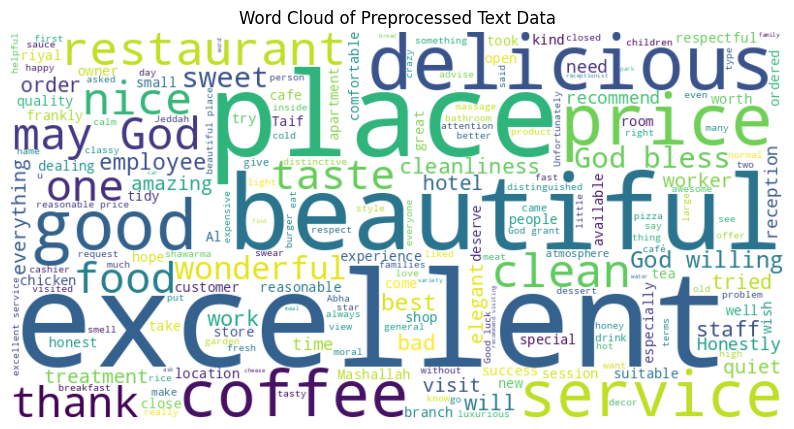

In [299]:
# Represent the preprocessed text data in a word cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all the preprocessed text into a single string, excluding 'None' values
all_text = " ".join(new_data[translated_columns].apply(lambda x: " ".join(filter(lambda word: word != 'None', x)), axis=1))

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud of Preprocessed Text Data')
plt.show()

In [300]:
unique_emotions = new_data['emotion'].unique()

# Print the unique emotions
for emotion in unique_emotions:
    print(emotion)


Happy
Love
Neutral
Angry
Sad


In [301]:
#Plot the new emotion column
unique_emotions = new_data['emotion'].unique()

# Count the occurrences of each emotion
emotion_counts = new_data["emotion"].value_counts()

# Create a bar plot
fig = go.Figure(data=[go.Bar(x=emotion_counts.index, y=emotion_counts.values)])

# Set the axis labels and title
fig.update_layout(
    xaxis=dict(title="Emotion"),
    yaxis=dict(title="Count"),
    title="Distribution of Emotions"
)

# Rotate x-axis labels for better readability
fig.update_xaxes(tickangle=45)

# Display the plot
fig.show()

In [302]:
emotion_counts = new_data["emotion"].value_counts()
emotion_counts

Neutral    3289
Love       3109
Happy       295
Sad         236
Angry       216
Name: emotion, dtype: int64

In [303]:
# Iterate over each column in the DataFrame
for column in new_data.columns:
    # Check if the column contains dictionaries
    if new_data[column].apply(lambda x: isinstance(x, dict)).any():
        print(f"Column '{column}' contains dictionaries.")

Column 'sentiment_scores' contains dictionaries.


# Text Data Balancing

In [304]:
# Data balancing by oversampling
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import json

# Convert dictionaries to strings
new_data['sentiment_scores'] = new_data['sentiment_scores'].apply(json.dumps)

# Separate the features and labels
X = new_data.drop(columns='emotion')
y = new_data['emotion']

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# One-hot encode categorical features
X_encoded = pd.get_dummies(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

# Instantiate the SMOTE oversampler
over_sampler = SMOTE()

# Apply oversampling to the minority class in the training set
X_train_resampled, y_train_resampled = over_sampler.fit_resample(X_train, y_train)

# Check the class distribution before resampling
original_counts = new_data['emotion'].value_counts()
print("Original Class Distribution:")
print(original_counts)

# Check the class distribution after resampling
resampled_counts = pd.Series(y_train_resampled).value_counts()
resampled_counts.index = label_encoder.inverse_transform(resampled_counts.index)  # Map encoded labels to original names
print("\nResampled Class Distribution:")
print(resampled_counts)

<ipython-input-304-c35681799a94>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-304-c35681799a94>:19: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)

<ipython-input-304-c35681799a94>:19: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)

<ipython-input-304-c35681799a94>:19: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)

<ipython-input-304-c35681799a94>:19: FutureWarning:

In a future version, the Index constructor will not in

Original Class Distribution:
Neutral    3289
Love       3109
Happy       295
Sad         236
Angry       216
Name: emotion, dtype: int64

Resampled Class Distribution:
Love       2622
Angry      2622
Neutral    2622
Happy      2622
Sad        2622
dtype: int64


In [ ]:
# Encode the target variable
label_encoder = LabelEncoder()
y_labels = label_encoder.fit_transform(new_data['emotion'])

# Count the occurrences of each category
resampled_counts = pd.Series(y_train_resampled).value_counts()
resampled_counts.index = label_encoder.inverse_transform(resampled_counts.index)  # Map encoded labels to original names

# Create a bar plot using Plotly
fig = go.Figure(data=[go.Bar(x=resampled_counts.index, y=resampled_counts.values)])

# Set the axis labels and title
fig.update_layout(
    xaxis=dict(title="Emotion"),
    yaxis=dict(title="Count"),
    title="Distribution of Emotions (After Oversampling)"
)

# Rotate x-axis labels for better readability
fig.update_xaxes(tickangle=45)

# Display the plot
fig.show()

# Another way to balance the data

In [ ]:
# Calculate the number of samples for each sentiment
emotion_counts = new_data['emotion'].value_counts()

# Find the minimum count among all sentiments
min_count = emotion_counts.min()

# Group the DataFrame by sentiment and sample the minimum count for each sentiment
balanced_df = new_data.groupby('emotion').apply(lambda x: x.sample(min_count)).reset_index(drop=True)

# Display the balanced DataFrame
print(balanced_df)

In [ ]:
# Calculate the count for each sentiment in the DataFrame
emotion_counts = balanced_df['emotion'].value_counts()

# Display the count for each sentiment
print(emotion_counts)

In [ ]:
# Count the occurrences of each emotion
emotion_counts = balanced_df["emotion"].value_counts()

# Create a bar plot
fig = go.Figure(data=[go.Bar(x=emotion_counts.index, y=emotion_counts.values)])

# Set the axis labels and title
fig.update_layout(
    xaxis=dict(title="Emotion"),
    yaxis=dict(title="Count"),
    title="Distribution of Emotions"
)

# Rotate x-axis labels for better readability
fig.update_xaxes(tickangle=45)

# Display the plot
fig.show()

In [ ]:
#recommend the places based on the user emotions. if user ask for a place based on his emotion
#user will be asked about his city.

In [305]:
# Save the updated dataset
new_data.to_csv('new_data_with_emotions.csv', index=False)